In [2]:
import numpy as np #imported numpy and Assigned as np
import pandas as pd #imported pandas and Assigned as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt #Used to plot the Graph by plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Used to Mount the Drive for Storage(kpsr6442GMAIL.COM(ML DATA))
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_csv('/content/drive/My Drive/Placement Fee/train_sample3_1(arima1.1).csv')
#DATA SET OF CSV FORMAT
#READING THE CSV DATA SET

In [5]:
df.tail()
#THE END DATA OF DATA SET IS DISPLAYED

,Month,w
100,10/21/2019,7
101,10/22/2019,8
102,10/23/2019,6
103,10/24/2019,6
104,10/25/2019,9


In [0]:
#df.drop(105,axis=0,inplace=True)
#Above command to remove a row from the data set
#105 indicates the index number or row number in the DATA SET

In [7]:
df.tail()

,Month,w
100,10/21/2019,7
101,10/22/2019,8
102,10/23/2019,6
103,10/24/2019,6
104,10/25/2019,9


In [0]:
#df.drop(106,axis=0,inplace=True)

In [0]:
df.columns=['Month','Waiting List Conformed' ]
#CLASSIFING THE X AND Y AXIS.

In [10]:
df.head()
#THE TOP DATA OF DATA SET IS DISPLAYED

,Month,Waiting List Conformed
0,6/3/2019,6
1,6/4/2019,5
2,6/5/2019,4
3,6/6/2019,6
4,6/7/2019,7


In [0]:
df['Month']=pd.to_datetime(df['Month'])
#THE MONTH COLUMN IN DATA SET IS TAKEN AS MONTH AND WHICH IS USED AS X AXIS ALSO.

In [12]:
df.head()

,Month,Waiting List Conformed
0,2019-06-03,6
1,2019-06-04,5
2,2019-06-05,4
3,2019-06-06,6
4,2019-06-07,7


In [0]:
df.set_index('Month',inplace=True)
#MONTH VALUE IS VALID OR NULL IN THE ROW

In [14]:
df.head()

,Waiting List Conformed
Month,
2019-06-03,6
2019-06-04,5
2019-06-05,4
2019-06-06,6
2019-06-07,7


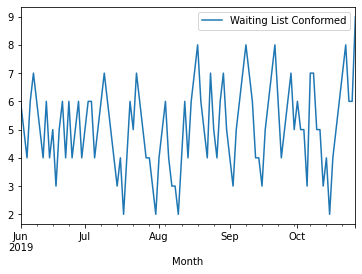

In [15]:
df.plot()
#PLOTING THE GRAPH by using X_axis and Y_axis as Month(X) && Waiting List Conformed(Y).

In [16]:
#Need to find order && Seasonal_order ,its a Proto-type Model Values
#Seasonal AutoRegressive Integrated Moving Average with exogenous regressors model
model=sm.tsa.statespace.SARIMAX(df['Waiting List Conformed'],order=(1, 0, 0),seasonal_order=(1,1,1,12))
results=model.fit()
#Best fitting model 

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  % freq, ValueWarning)


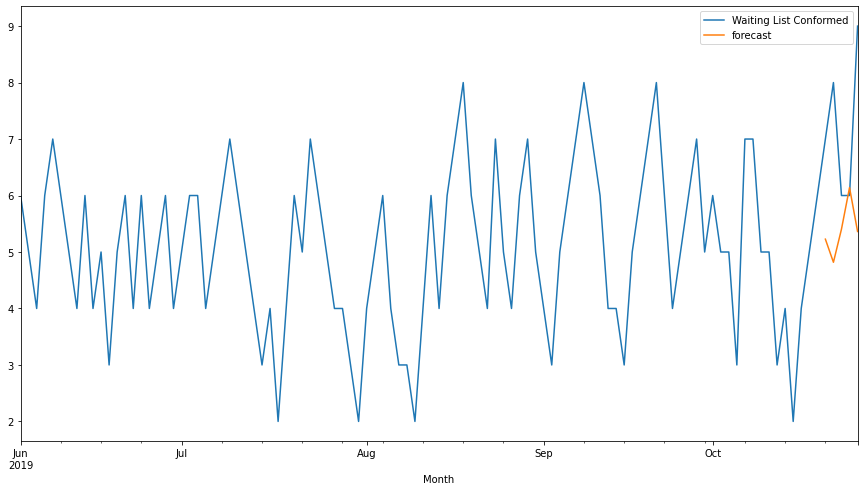

In [17]:
#start value is starting value to predict
#END Value is Ending value to predict.
df['forecast']=results.predict(start=100,end=120,dynamic=True)
#figsize is size of below graph window.
df[['Waiting List Conformed','forecast']].plot(figsize=(15,8))

In [0]:
from pandas.tseries.offsets import DateOffset
#days can be replaced with years,months,days etc.
#range is the range of values to predict in the graph.
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,15)]

In [0]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [20]:
future_datest_df
#future values to be needed to predict  

,Waiting List Conformed,forecast
2019-10-26,NaN,NaN
2019-10-27,NaN,NaN
2019-10-28,NaN,NaN
2019-10-29,NaN,NaN
2019-10-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-01,NaN,NaN
2019-11-02,NaN,NaN
2019-11-03,NaN,NaN
2019-11-04,NaN,NaN


In [0]:
#combining past and future values   
future_df=pd.concat([df,future_datest_df])

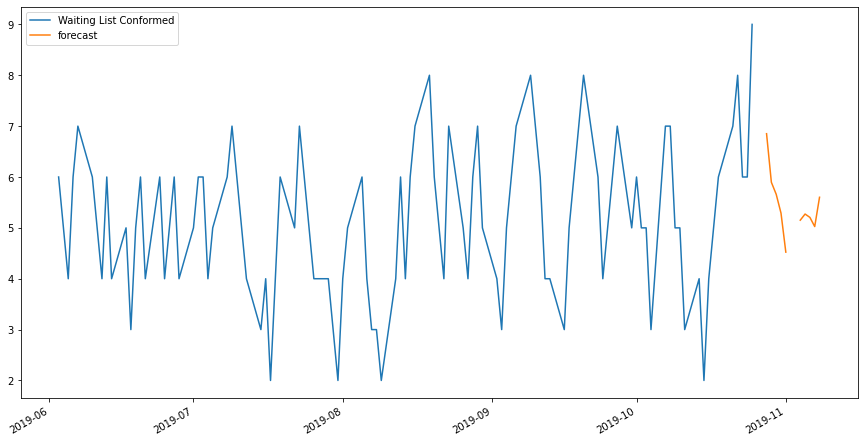

In [22]:
b=future_df['forecast'] = results.predict(start = 105, end = 120, dynamic= True)
#future predicted values are saved in form of b.
#index value start and end in csv data set.dynamic true is no null values in between.
future_df[['Waiting List Conformed', 'forecast']].plot(figsize=(15, 8))
#print(pyplot.show())

In [23]:
b
#we can use b to use the data values to Sent it to the web server. 

2019-10-28    6.851333
2019-10-29    5.896015
2019-10-30    5.660706
2019-10-31    5.289774
2019-11-01    4.522520
2019-11-04    5.150882
2019-11-05    5.271766
2019-11-06    5.205605
2019-11-07    5.025473
2019-11-08    5.601400
2019-11-11    6.173977
2019-11-12    5.915067
2019-11-13    5.414790
2019-11-14    5.021272
2019-11-15    5.221620
2019-11-18    4.831230
Freq: B, dtype: float64